In [1]:
import pm4py
import pandas as pd

# pd.options.display.max_rows = 4000

In [3]:
log = pd.read_csv("ircc_uOttawa-filter2.csv")

In [ ]:
# log = log[['case_id', 'event', 'timestamp', 'act_upd_by', 'cor']]
# log = log.rename(columns={ 'case_id' : 'case:concept:name', 'event': 'concept:name', 'timestamp': 'time:timestamp' })
# log['case:concept:name'] = log['case:concept:name'].astype(str)
# log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])
# log

,case:concept:name,concept:name,time:timestamp,act_upd_by,cor
0,1,Misrepresentation - NIL,2024-06-03 00:00:00.000,CLIENT,Vietnam
1,1,Eligibility Assessment - NIL,2024-06-03 00:00:00.000,CLIENT,Vietnam
2,1,Final Assessment - NIL,2024-06-03 00:00:00.000,CLIENT,Vietnam
3,1,Received - Date,2024-06-03 00:00:00.000,CLIENT,Vietnam
4,1,Application Status - Prospective,2024-06-03 09:20:37.327,EAIMEL,Vietnam
...,...,...,...,...,...
543278,7734,Other Reqs Assessment - NIL,2024-06-17 07:46:39.433,SS36358,Belgium
543279,7734,Eligibility Assessment - Review Required,2024-06-26 08:11:25.043,SS36358,Belgium
543280,7734,Eligibility Assessment - Failed,2024-06-28 10:45:09.050,SS36358,Belgium
543281,7734,Final Assessment - Refused,2024-06-28 10:45:09.587,SS36358,Belgium


In [ ]:
# from mine_utils import log_subset_horizontal

# log = log_subset_horizontal(log, 0.02)
# log 

,case:concept:name,concept:name,time:timestamp,act_upd_by,cor
0,1,Misrepresentation - NIL,2024-06-03 00:00:00.000,CLIENT,Vietnam
1,1,Eligibility Assessment - NIL,2024-06-03 00:00:00.000,CLIENT,Vietnam
2,1,Final Assessment - NIL,2024-06-03 00:00:00.000,CLIENT,Vietnam
3,1,Received - Date,2024-06-03 00:00:00.000,CLIENT,Vietnam
4,1,Application Status - Prospective,2024-06-03 09:20:37.327,EAIMEL,Vietnam
...,...,...,...,...,...
10904,155,Medical Assessment - Passed,2024-06-20 13:15:00.110,KC14486,China
10905,155,Eligibility Assessment - Recommend Interview,2024-06-20 18:08:57.550,KC14486,China
10906,155,Final Assessment - Approved,2024-06-25 17:26:44.193,KC14486,China
10907,155,Eligibility Assessment - Passed,2024-06-25 17:26:44.197,KC14486,China


In [34]:
# from mine_utils import log_subset_vertical

# log = log_subset_vertical(log, 0.25)
# log

In [ ]:
# log.to_csv("ircc_uOttawa_subset.csv", index=False)

In [ ]:
# import pm4py.objects.log.exporter.xes.exporter as xes_export
# xes_export.apply(log, "ircc_uOttawa_subset.xes")

In [4]:
import pm4py
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.conversion.process_tree import converter as process_tree_converter

def run_alpha(log):
    return alpha_miner.apply(log)

def run_induct(log):
    process_tree = inductive_miner.apply(log)
    return process_tree_converter.apply(process_tree)

In [6]:
from sklearn.cluster import KMeans
from cluster_utils import eval_cluster_metrics

clusterer = KMeans(n_clusters=3, random_state=0, n_init='auto')
# relies on trace-based features (see feature_extraction below)
clust_logs = pm4py.cluster_log(log, sklearn_clusterer=clusterer)
sublogs = [ pm4py.convert_to_dataframe(clust_log) for clust_log in clust_logs ]

eval_cluster_metrics(log, sublogs, run_induct, show_progress_bar=True)


> evaluating sublog metrics
mining original process
getting metrics
getting metrics


replaying log with TBR, completed traces ::   0%|          | 0/1465 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/8890 [00:00<?, ?it/s]


original log
(num cases: 6187)
{'fscore': 0.2752802994651439, 'log_fitness': 0.9813655127667635, 'precision': 0.16009391448639632, 'generalization': 0.9622641157230973, 'simplicity': 0.5163398692810457}

sublog 0
(num cases: 2132)
mining subprocess
getting metrics


replaying log with TBR, completed traces ::   0%|          | 0/1465 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/8890 [00:00<?, ?it/s]

{'fscore': 0.2636919030009318, 'log_fitness': 0.9708018143205391, 'precision': 0.1525661773161967, 'generalization': 0.9645618188676545, 'simplicity': 0.5968379446640316}

sublog 1
(num cases: 1928)
mining subprocess
getting metrics


replaying log with TBR, completed traces ::   0%|          | 0/1465 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/8890 [00:00<?, ?it/s]

{'fscore': 0.0, 'log_fitness': 0.9814725958801637, 'precision': 0.0, 'generalization': 0.9647658671927473, 'simplicity': 0.5319148936170213}

sublog 2
(num cases: 2127)
mining subprocess
getting metrics


replaying log with TBR, completed traces ::   0%|          | 0/1465 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/8890 [00:00<?, ?it/s]

{'fscore': 0.27138439278829257, 'log_fitness': 0.9840229600421985, 'precision': 0.15739643364600475, 'generalization': 0.9704570287930139, 'simplicity': 0.5483870967741935}

avg fscore: 0.1783587652630748


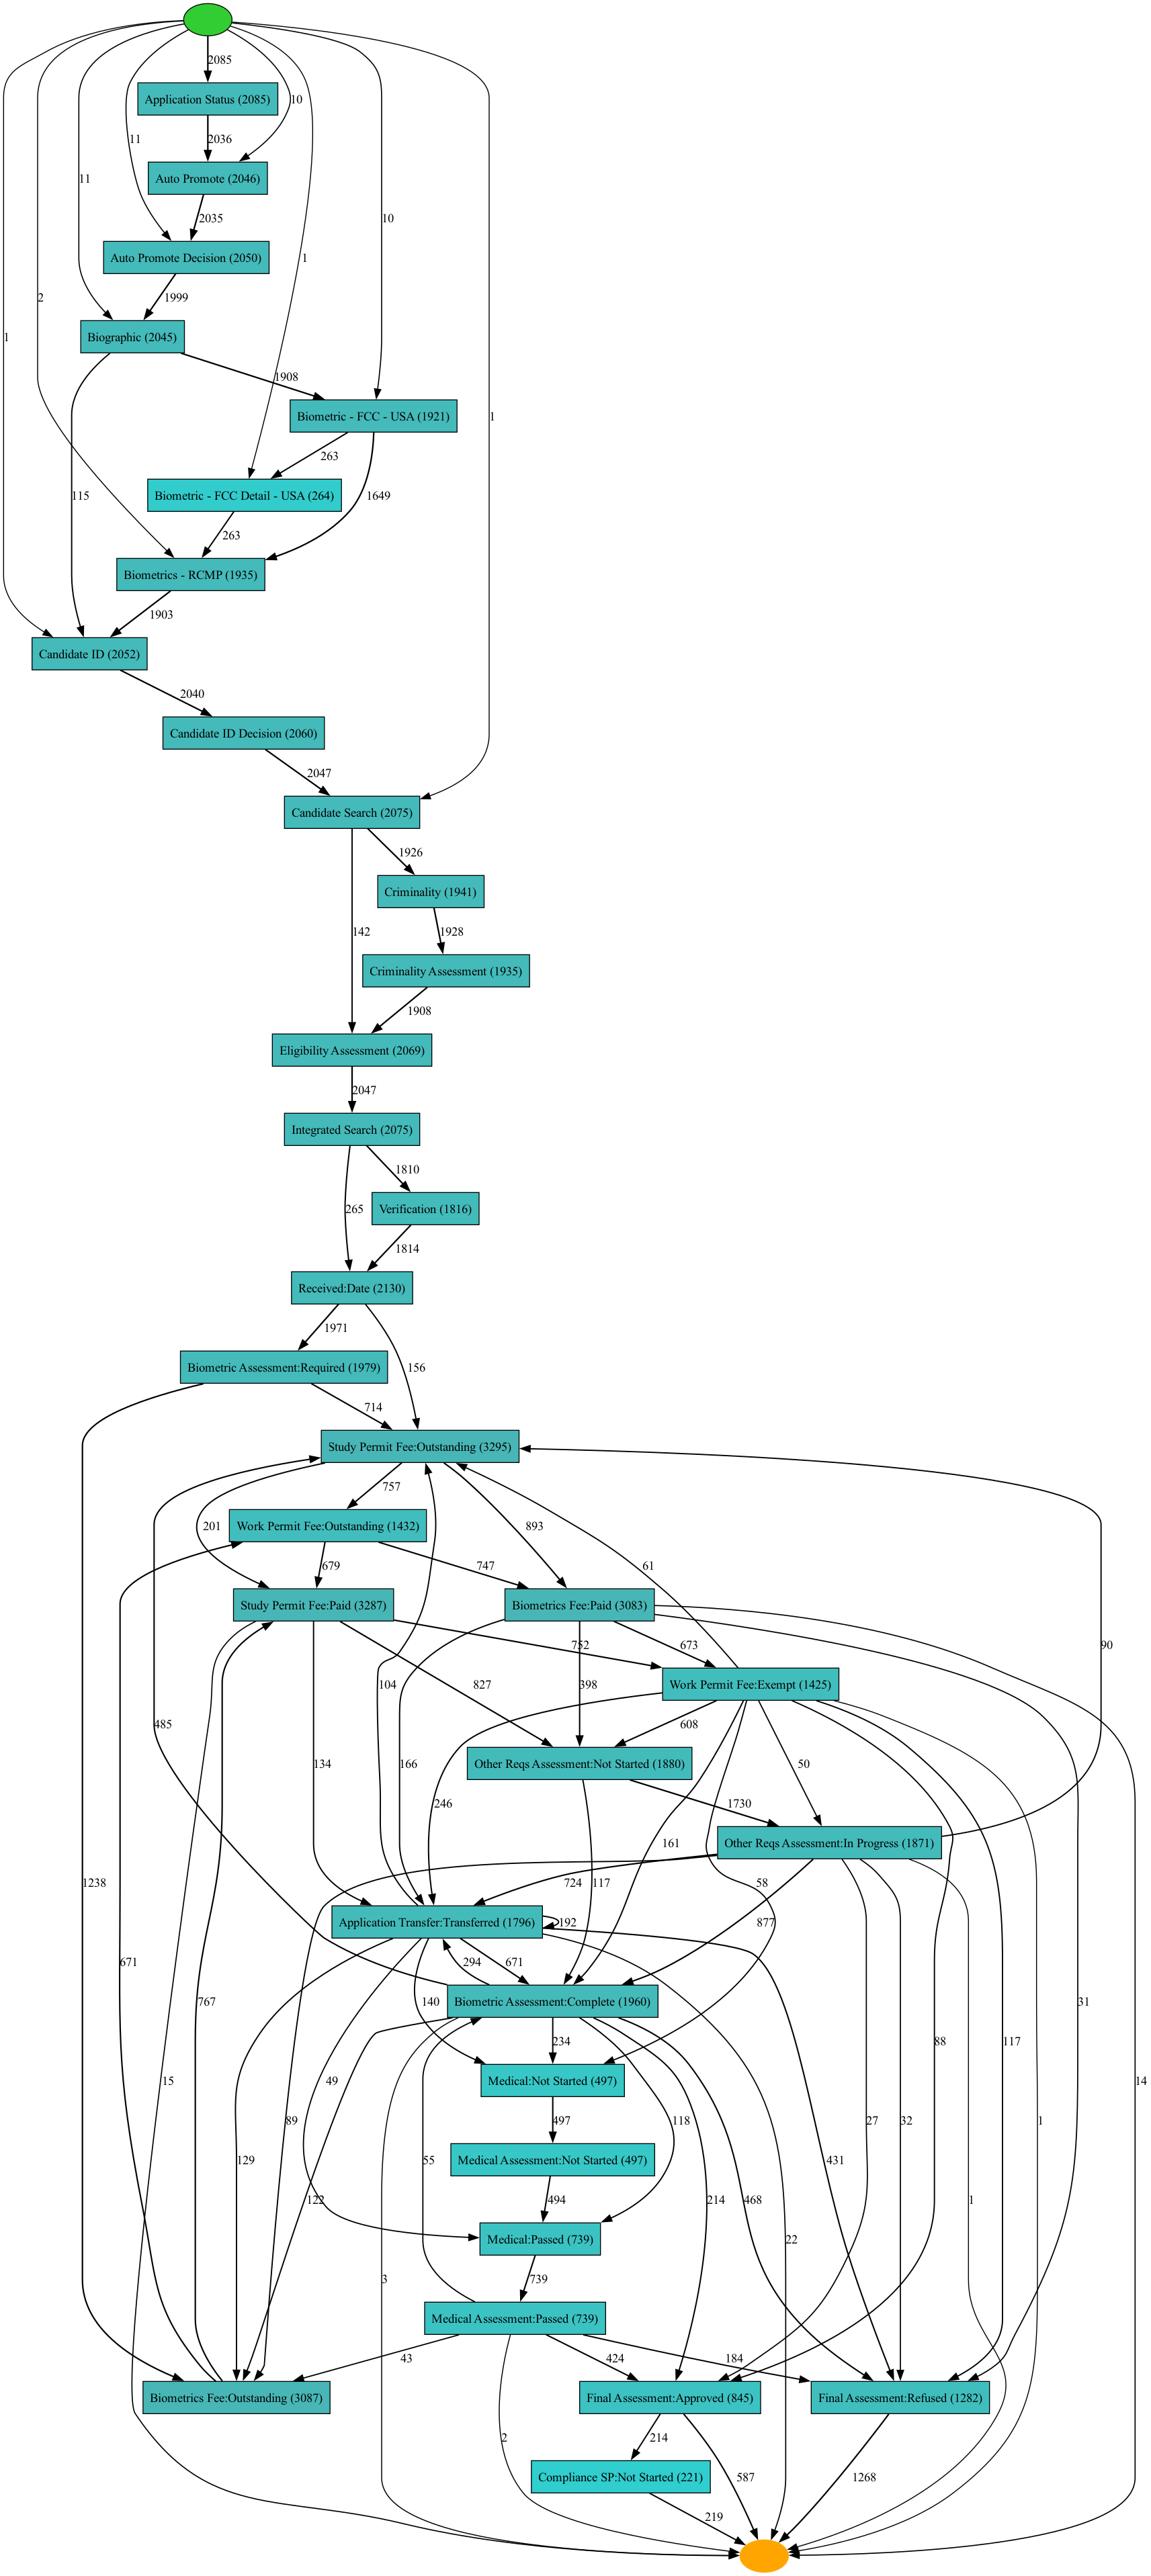

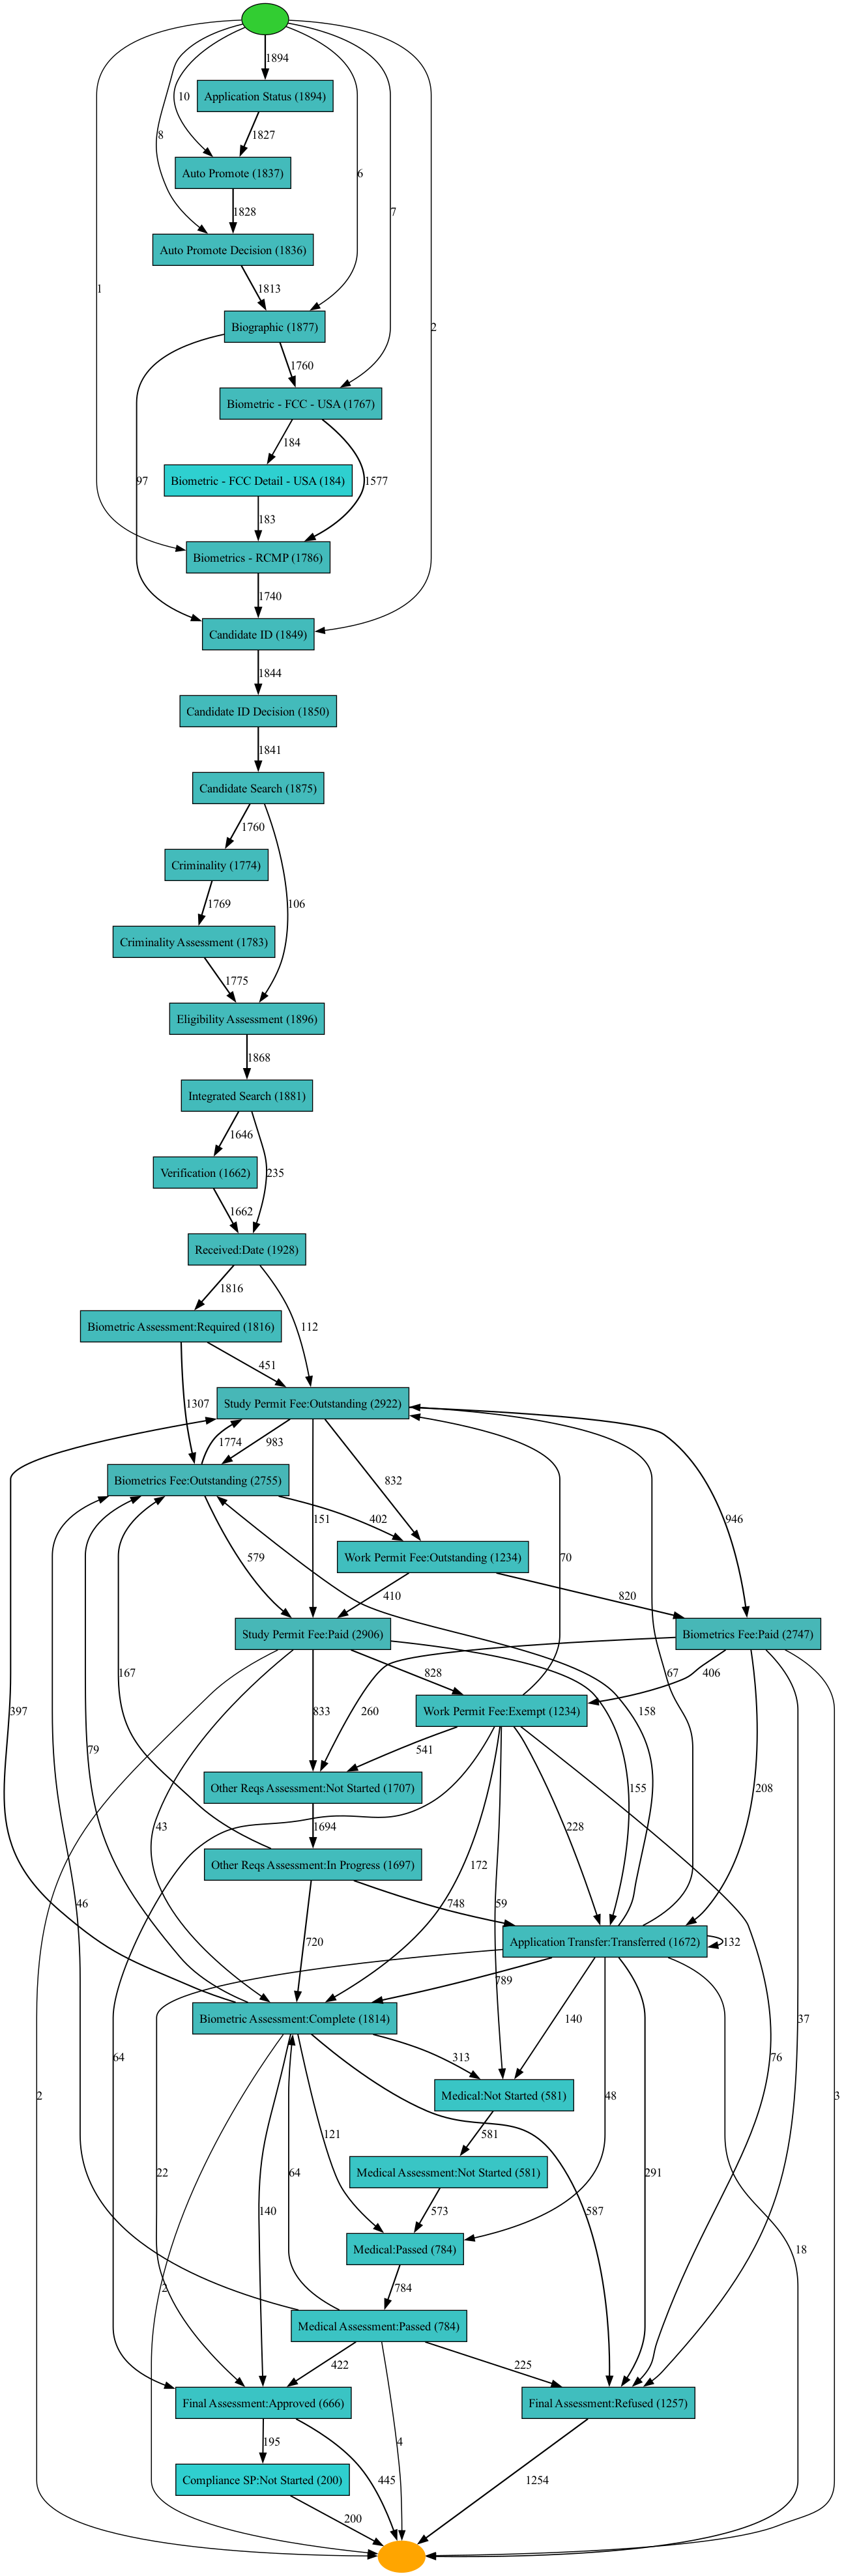

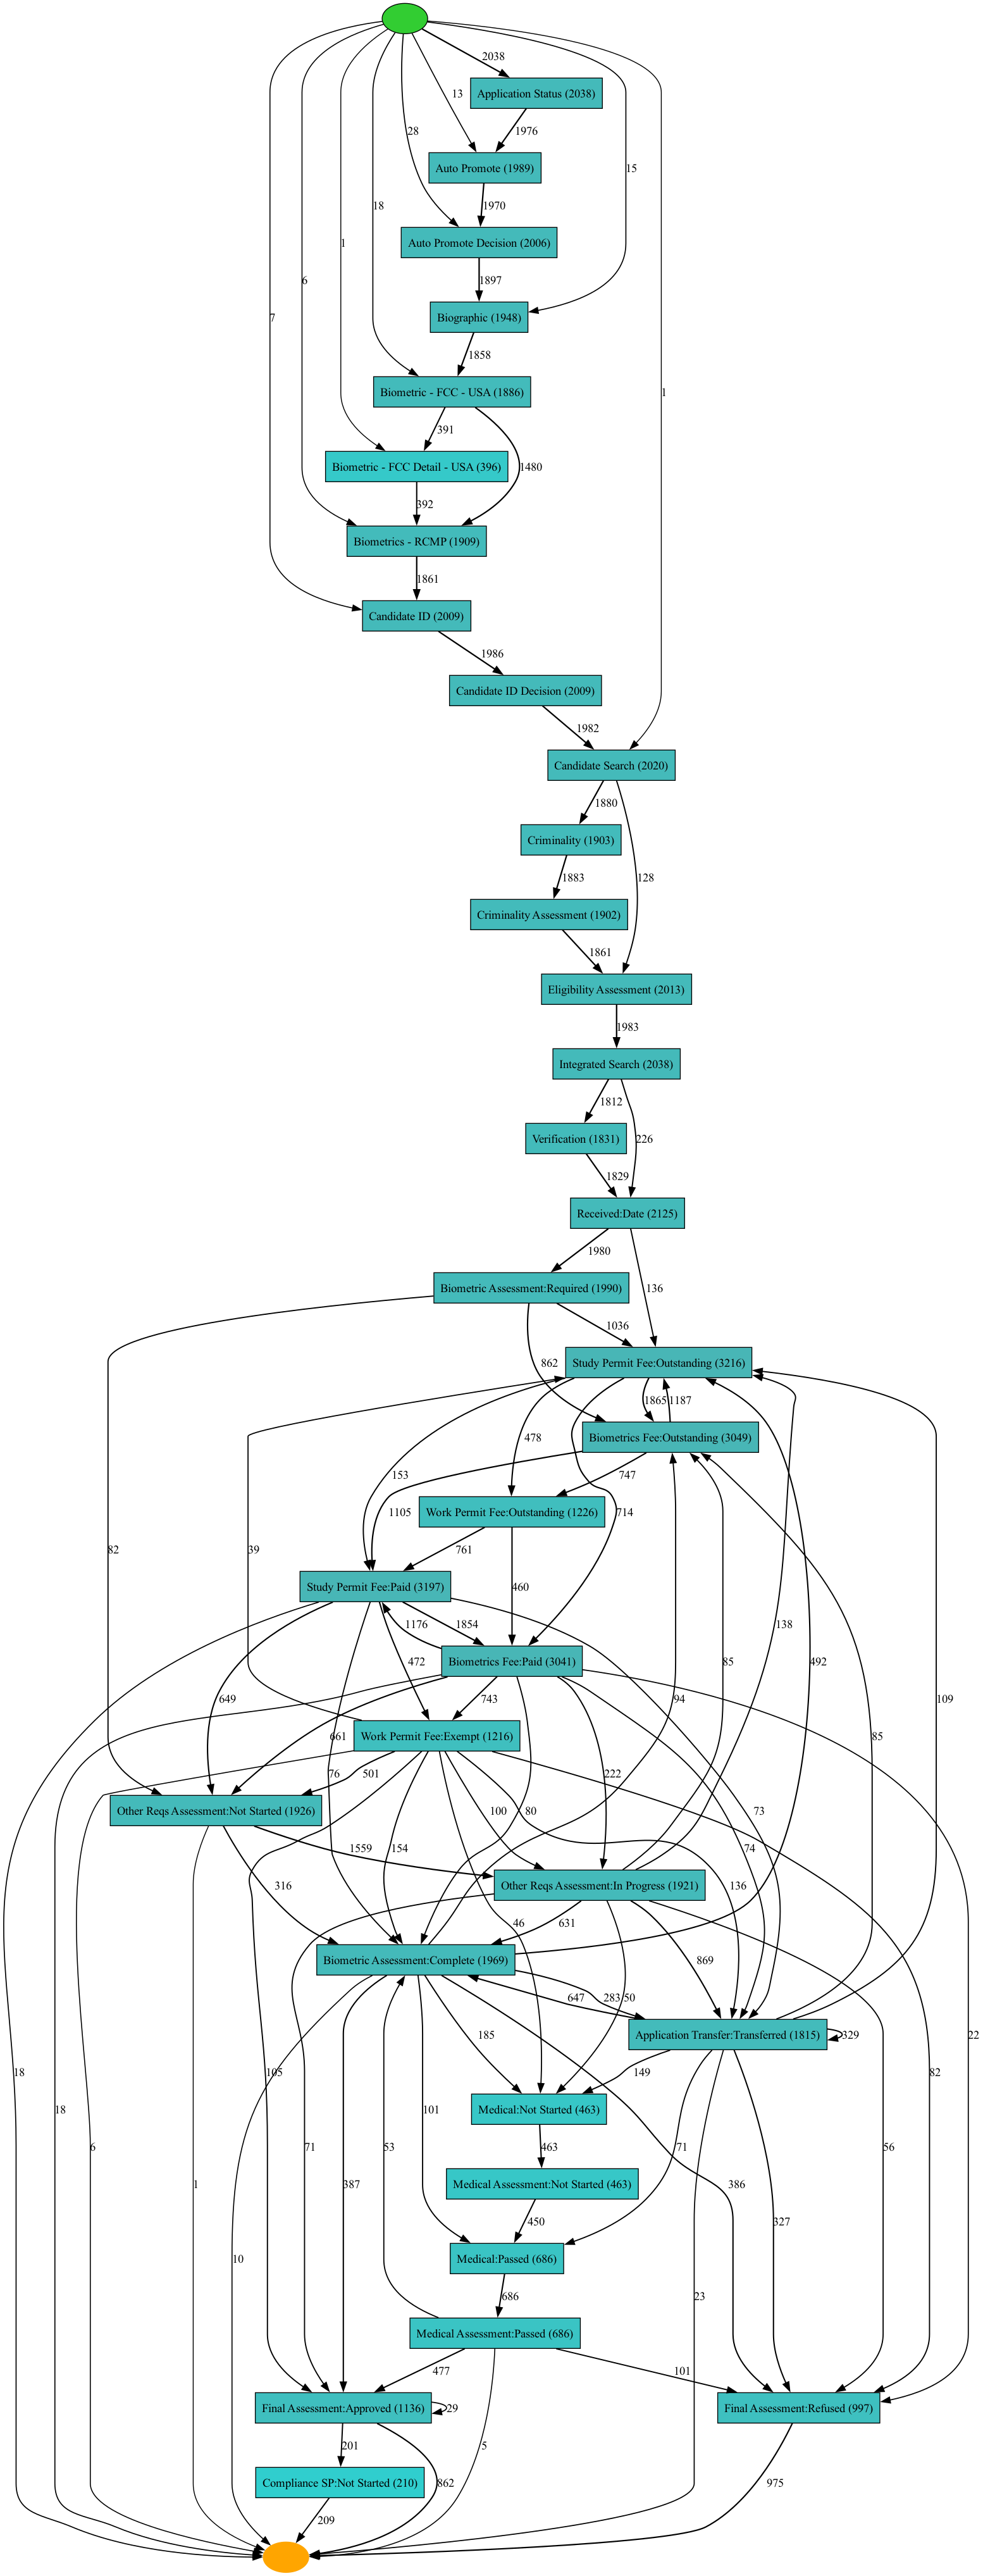

In [7]:
from mine_utils import mine_heur

mine_heur(sublogs[0])
mine_heur(sublogs[1])
mine_heur(sublogs[2])